In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df=pd.read_csv('E://projects//python//Python_Diwali_Sales_Analysis//Diwali Sales Data.csv',encoding='unicode_escape')
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.shape

(11251, 15)

In [10]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [14]:
df['Amount'].isna().sum()

12

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [16]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [17]:
df.head(1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0


In [19]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(11239, 13)

In [22]:
df['Amount']=df['Amount'].astype('int')

In [23]:
df['Amount'].dtypes

dtype('int32')

In [25]:
df.rename(columns={'Age Group':'Age_Group'}).head(1)

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952


In [26]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

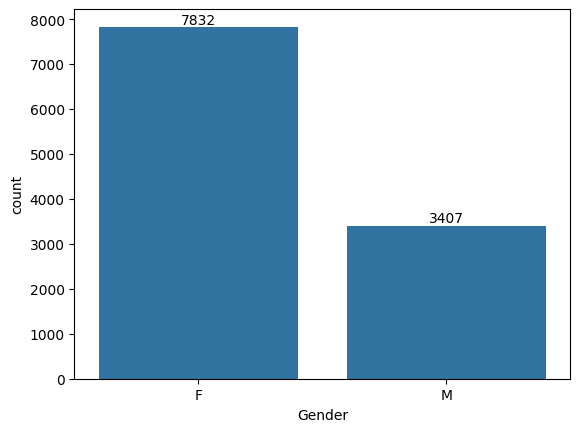

In [29]:
ax=sns.countplot(x="Gender",data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [31]:
sales_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_gender

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

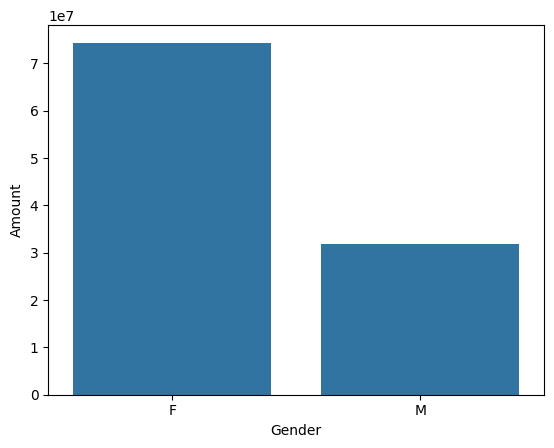

In [34]:
sns.barplot(x='Gender',y='Amount',data=sales_gender)

### From above plot we can see that Female has more purchsing power than Man

## Age

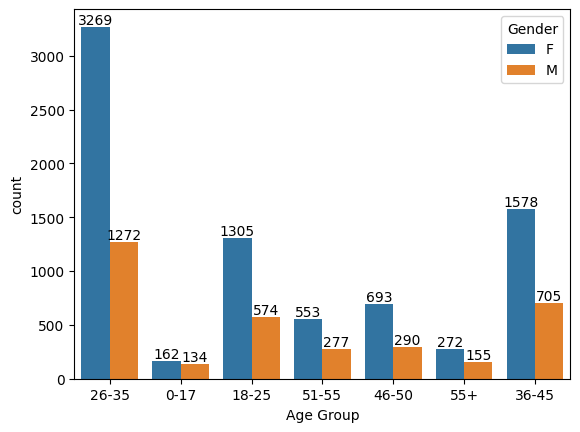

In [37]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

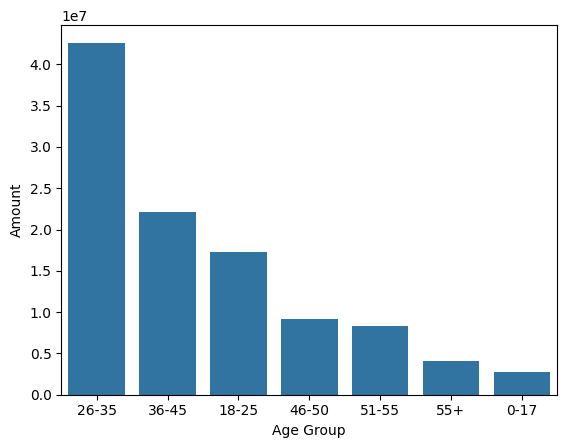

In [43]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

### From above graph we can see that age group between 26-35 has high spending power

## State

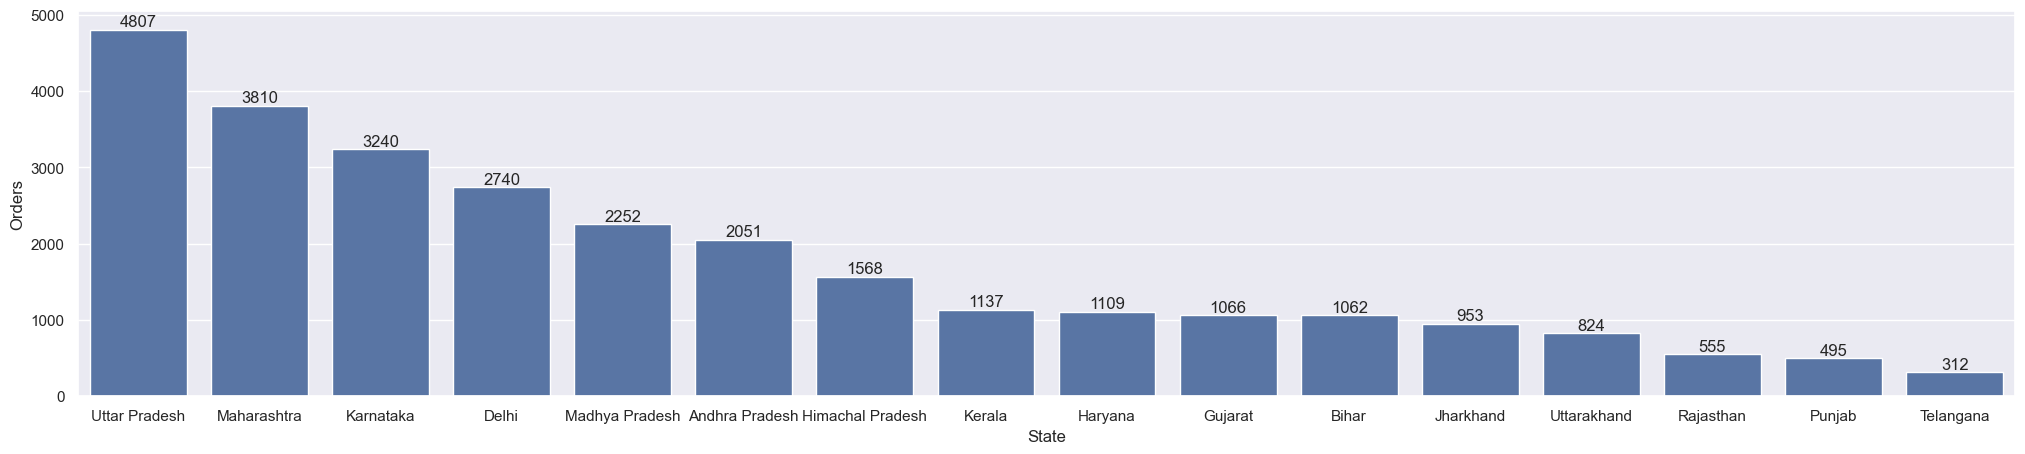

In [56]:
cnt_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.barplot(data=cnt_state,x='State',y='Orders')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Amount'>

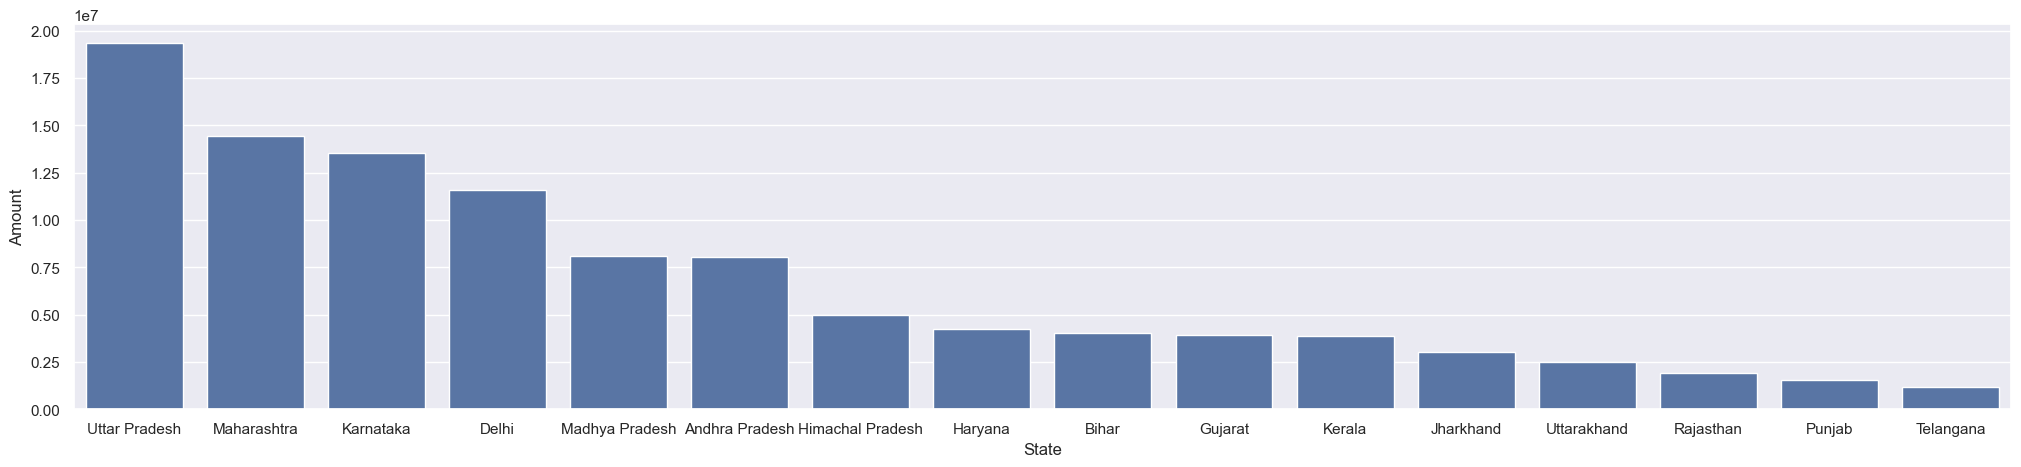

In [59]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.barplot(data=sales_state,x='State',y='Amount')
ax

In [64]:
/*** 
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
ax=sns.barplot(data=sales_state,x='State',y='Amount')
***/

SyntaxError: invalid syntax (3703368578.py, line 1)

### From graph you can see that Majority of order are from Up, Maharasthra, Karnataka....kerala has less spending power than haryana bihar gujrat

## Marital Status

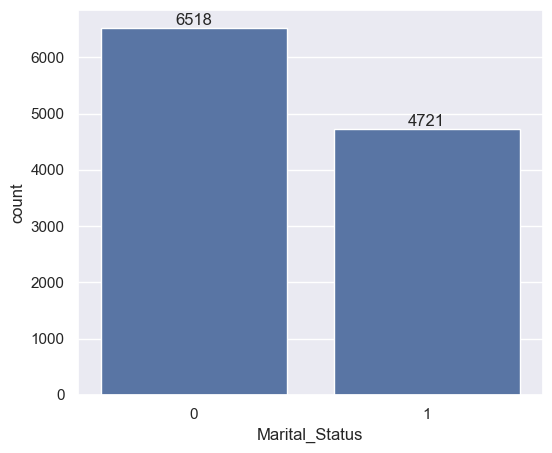

In [79]:
sns.set(rc={'figure.figsize':(6,5)})
ax=sns.countplot(data=df,x='Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

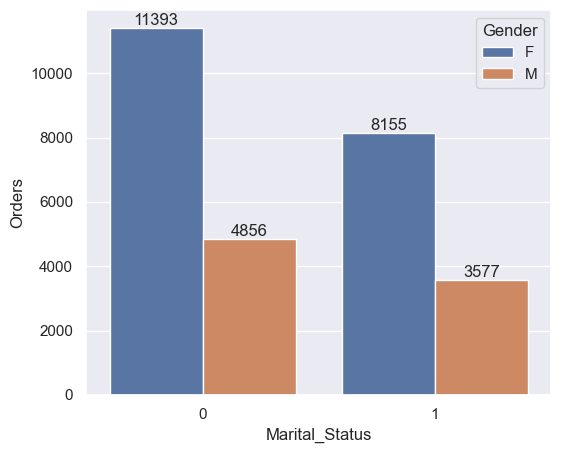

In [82]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
ax=sns.barplot(data=sales_state,x='Marital_Status',y='Orders',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

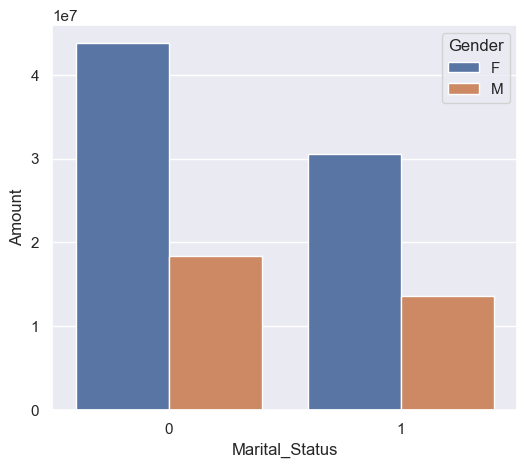

In [81]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
ax=sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')


## Occupations

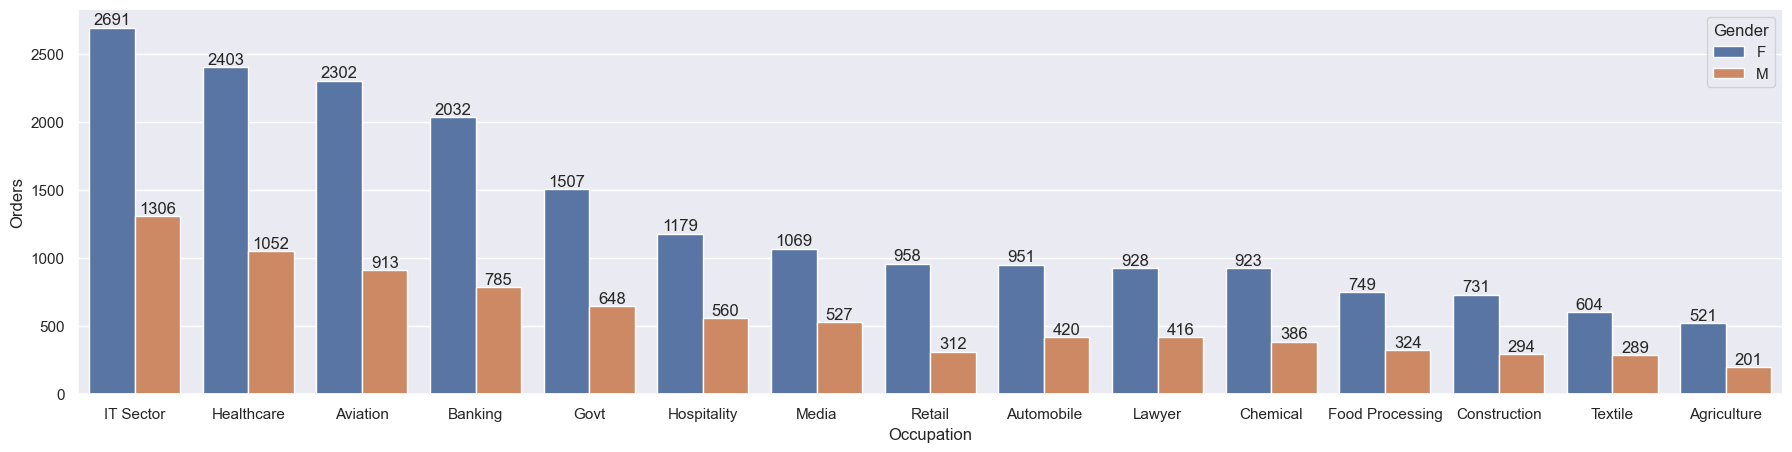

In [90]:
sales_occ=df.groupby(['Occupation','Gender'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(22,5)})
ax=sns.barplot(data=sales_occ,x='Occupation',y='Orders',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

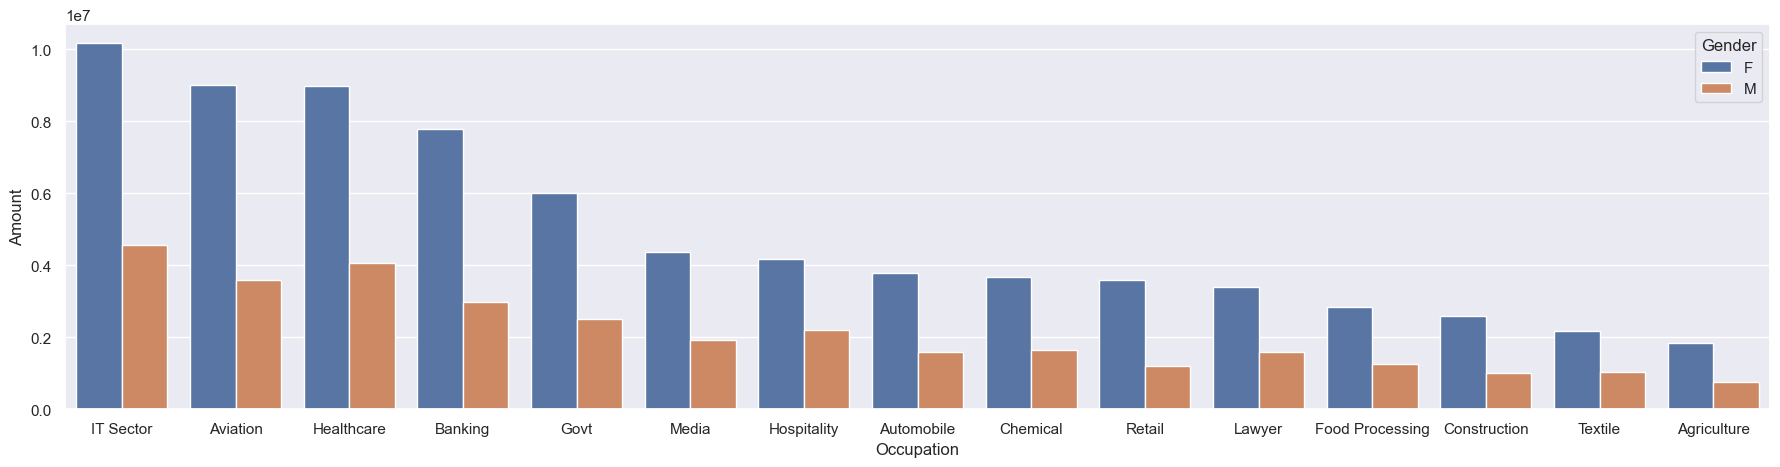

In [91]:
sales_occ=df.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(22,5)})
ax=sns.barplot(data=sales_occ,x='Occupation',y='Amount',hue='Gender')

## Product Category

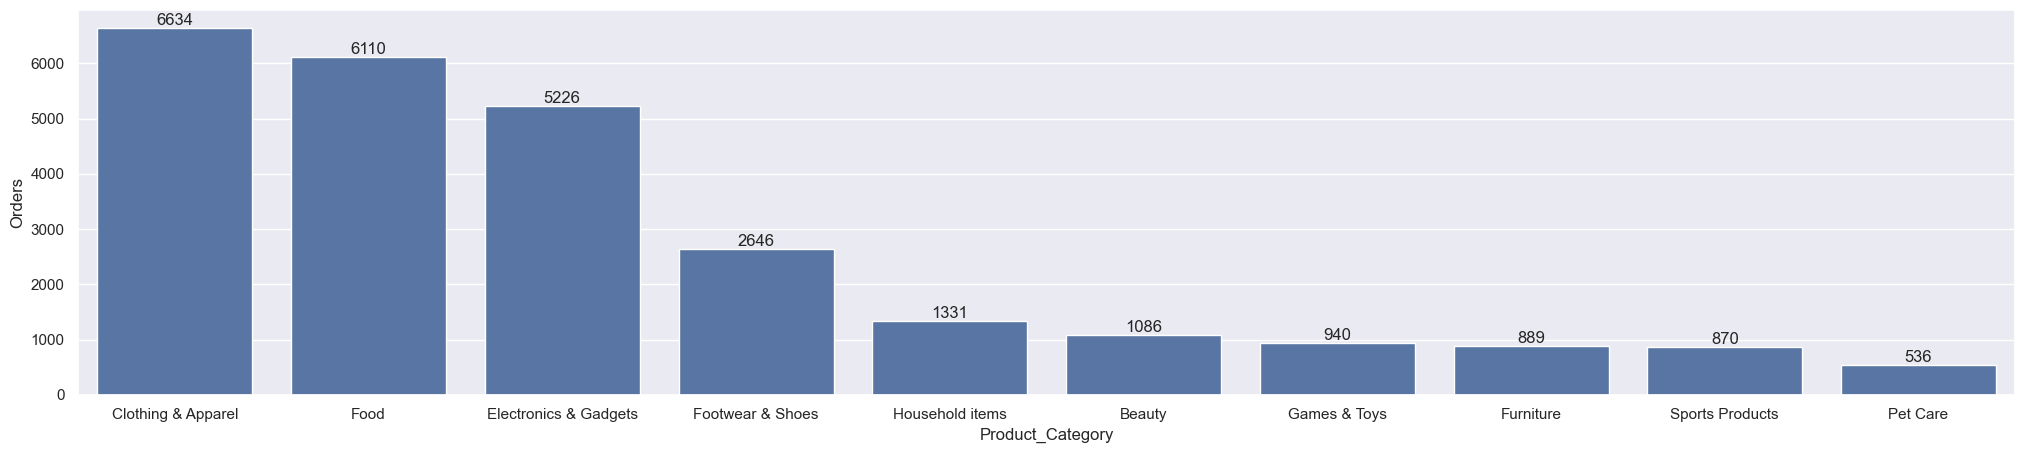

In [102]:
sales_occ=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.barplot(data=sales_occ,x='Product_Category',y='Orders')

for bars in ax.containers:
    ax.bar_label(bars)

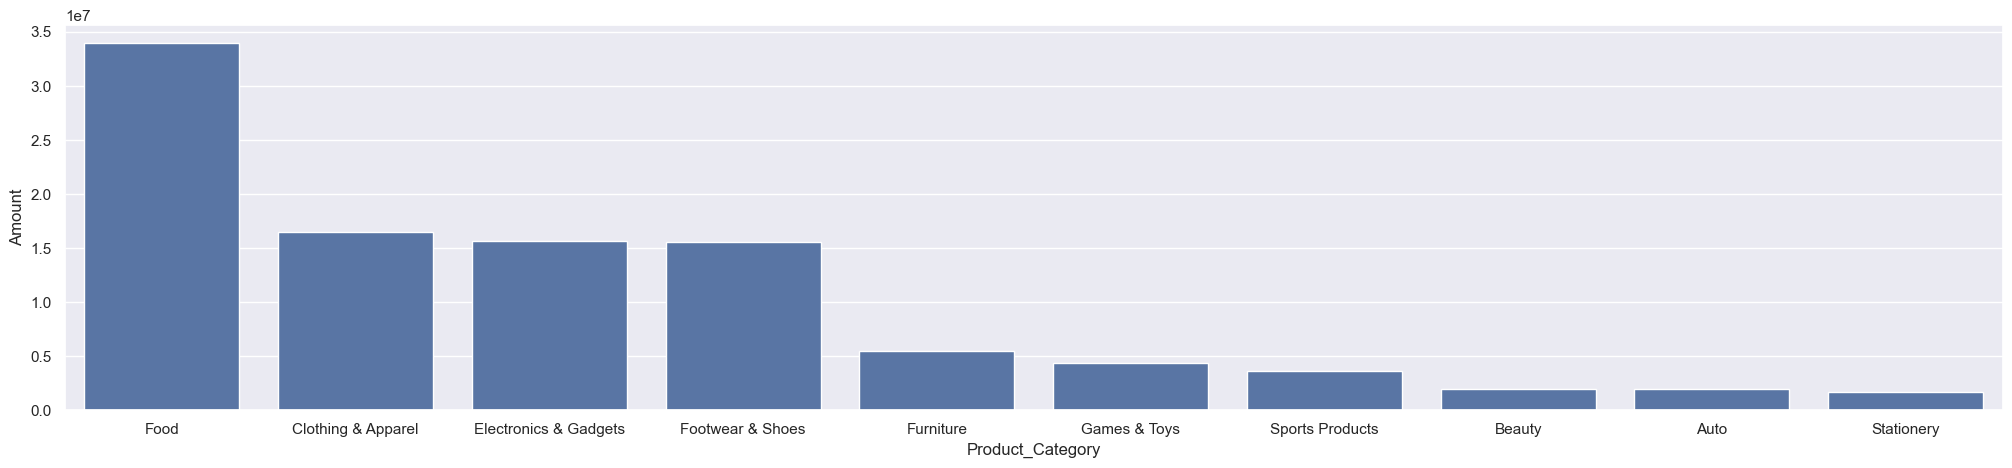

In [103]:
sales_occ=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.barplot(data=sales_occ,x='Product_Category',y='Amount')

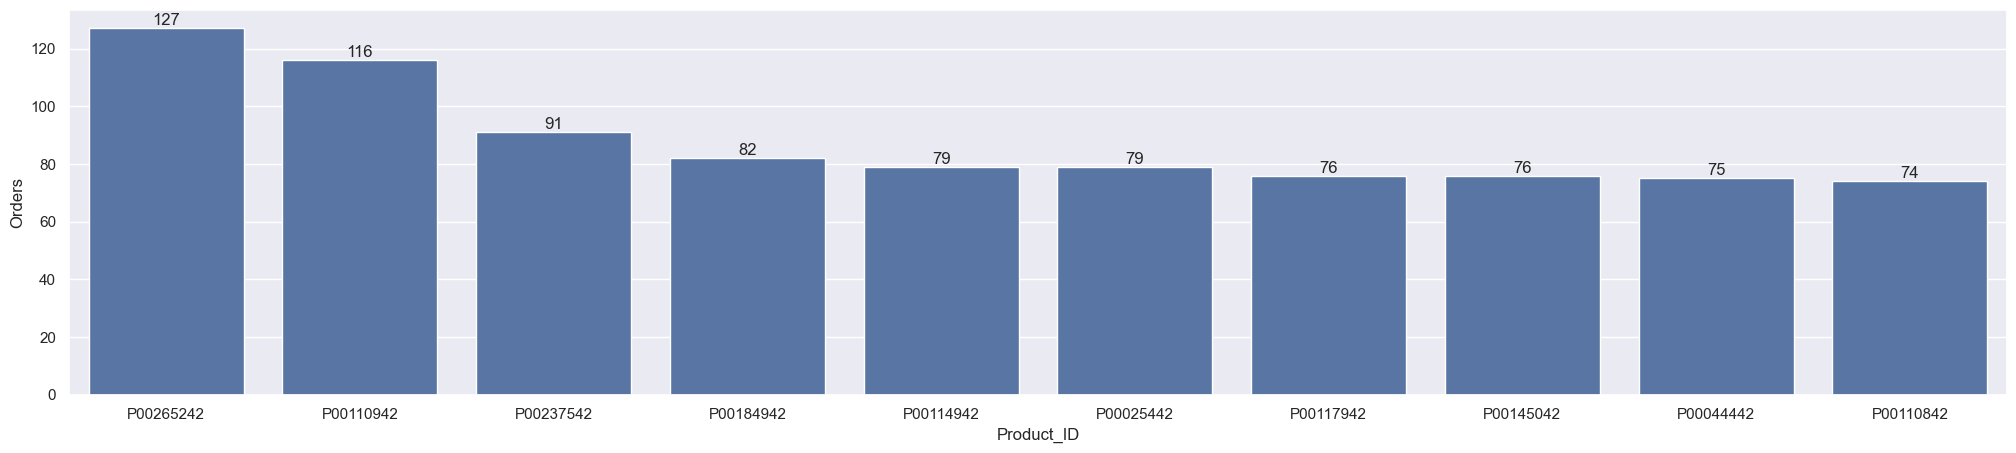

In [104]:
sales_occ=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.barplot(data=sales_occ,x='Product_ID',y='Orders')

for bars in ax.containers:
    ax.bar_label(bars)

## conclusion

### Married women between 26-35 age group  from UP maharasthra and Karnataka working in IT, healtcare and Avaition sectors  are more likely to buy products from food ,clothing electronics and footwears.